In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.signal import medfilt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [3]:
df = pd.read_csv('_kaspi_train.csv')
df = df.iloc[:, 2:]
df.head()

,date,account
0,2017-01-01,141969
1,2017-01-02,127567
2,2017-01-03,126604
3,2017-01-04,125932
4,2017-01-05,125047


# Business Understanding and Time Series EDA

##### Спрогнозировать остатки счёта "топ менеджера" за 2020 год, имея его каждодневные остатки счета за 3 года с 2017 по 2019.

In [4]:
plt.style.use('ggplot')

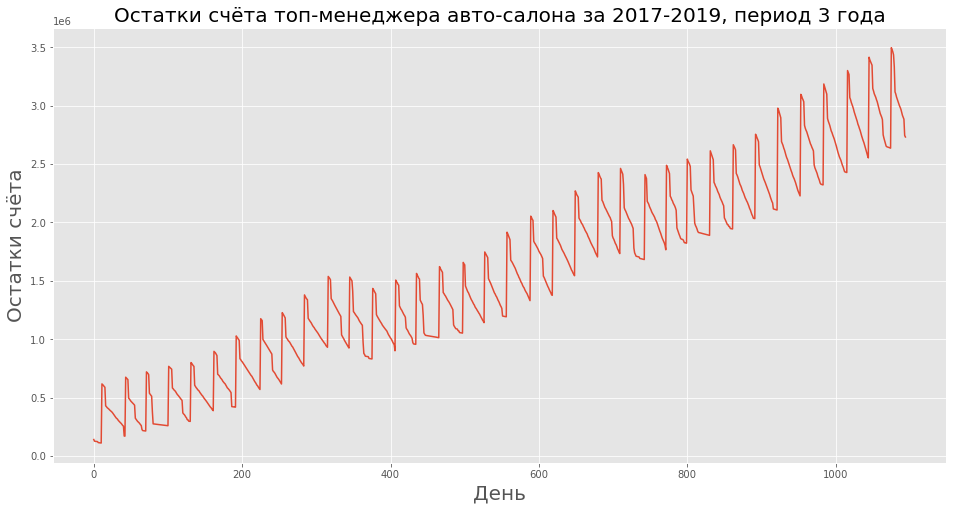

In [5]:
ax, fig = plt.subplots(figsize = (16, 8))
df.account.plot()
plt.title('Остатки счёта топ-менеджера авто-салона за 2017-2019, период 3 года', fontdict = {'fontsize': 20})
plt.xlabel('День', fontdict = {'fontsize': 20})
plt.ylabel('Остатки счёта', fontdict = {'fontsize': 20})
plt.show()

##### Линеный тренд (тренд --> нестационарность), аддитивная сезонность, подтверждается STL разложением

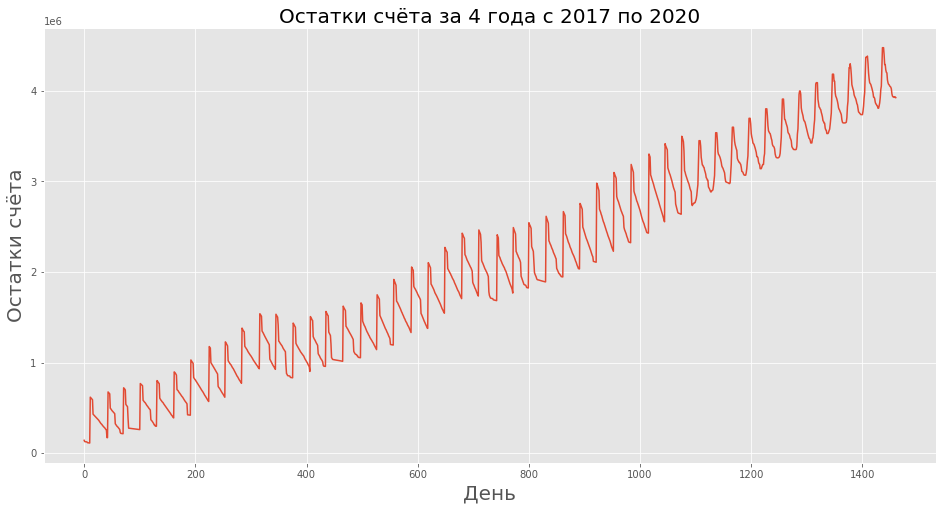

In [53]:
ax, fig = plt.subplots(figsize = (16, 8))
df_total.account.plot()
plt.title('Остатки счёта за 4 года с 2017 по 2020', fontdict = {'fontsize': 20})
plt.xlabel('День', fontdict = {'fontsize': 20})
plt.ylabel('Остатки счёта', fontdict = {'fontsize': 20})
plt.show()

## Критерий Дики-Фуллера:
#### {$H_0$: ряд нестационарен, $H_1$: ряд стационарен}

p-value тест Дики-Фуллера = 0.887234


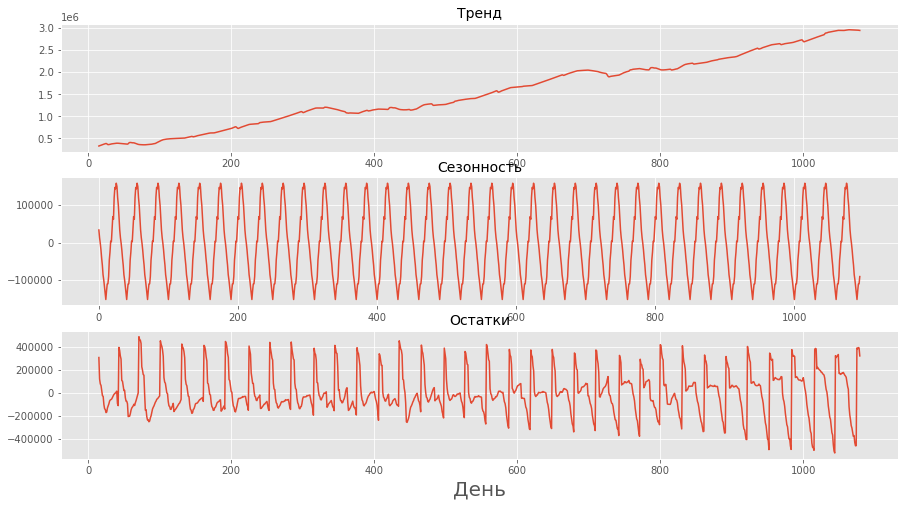

In [6]:
seas_dec = seasonal_decompose(df['account'], model='additive', period = 30)

fig, (ax_1, ax_2, ax_3) = plt.subplots(3, 1, figsize = (15, 8))

seas_dec.trend.plot(ax = ax_1)
ax_1.set_title('Тренд', fontdict = {'fontsize': 14})

seas_dec.seasonal.plot(ax = ax_2)
ax_2.set_title('Сезонность', fontdict = {'fontsize': 14})

seas_dec.resid.plot(ax = ax_3)
ax_3.set_title('Остатки', fontdict = {'fontsize': 14})

plt.xlabel('День', fontdict = {'fontsize': 20})
print("p-value тест Дики-Фуллера = %f" % sm.tsa.stattools.adfuller(df.account)[1])
plt.show()

In [7]:
df['datetime'] = pd.to_datetime(df['date'])
df['year'] = df.datetime.dt.year
df['month'] = df.datetime.dt.month
df['day'] = df.datetime.dt.day

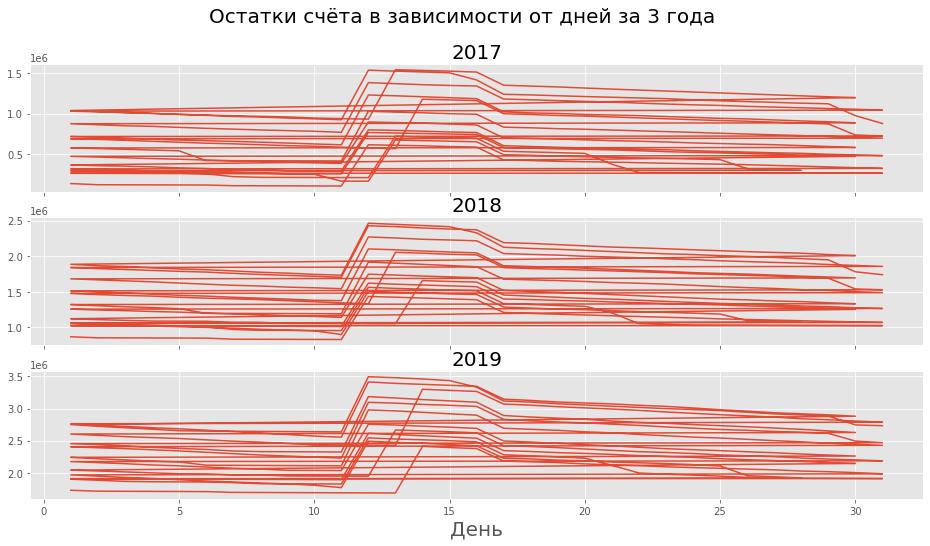

In [8]:
fig, axs = plt.subplots(3, sharex = True, figsize = (16, 8))
fig.suptitle('Остатки счёта в зависимости от дней за 3 года', fontsize = 20)

x1 = df[df['year'] == 2017].day
y1 = df[df['year'] == 2017].account

x2 = df[df['year'] == 2018].day
y2 = df[df['year'] == 2018].account

x3 = df[df['year'] == 2019].day
y3 = df[df['year'] == 2019].account

axs[0].plot(x1, y1)
axs[0].set_title('2017', fontsize = 20)

axs[1].plot(x2, y2)
axs[1].set_title('2018', fontsize = 20)

axs[2].plot(x3, y3)
axs[2].set_title('2019', fontsize = 20)

plt.xlabel('День', fontdict = {'fontsize': 20})
plt.show()

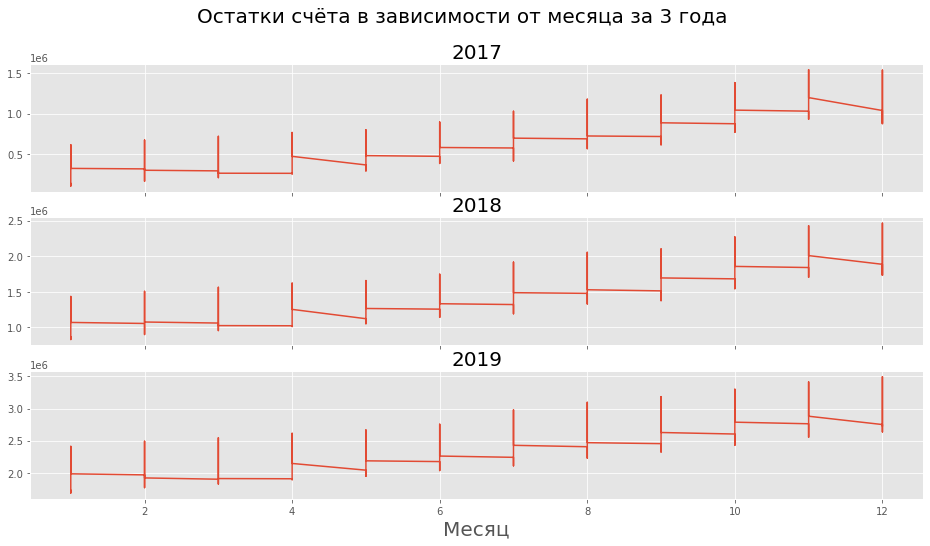

In [9]:
fig, axs = plt.subplots(3, sharex = True, figsize = (16, 8))
fig.suptitle('Остатки счёта в зависимости от месяца за 3 года', fontsize = 20)

x1 = df[df['year'] == 2017].month
y1 = df[df['year'] == 2017].account

x2 = df[df['year'] == 2018].month
y2 = df[df['year'] == 2018].account

x3 = df[df['year'] == 2019].month
y3 = df[df['year'] == 2019].account

axs[0].plot(x1, y1)
axs[0].set_title('2017', fontsize = 20)

axs[1].plot(x2, y2)
axs[1].set_title('2018', fontsize = 20)

axs[2].plot(x3, y3)
axs[2].set_title('2019', fontsize = 20)

plt.xlabel('Месяц', fontdict = {'fontsize': 20})
plt.show()

In [10]:
df[((df['month'] == 4) | (df['month'] == 12)) & (df['day'] >= 16) & (df['day'] <= 17)].account.diff(periods = 1)[1::2]

106    -160855.0
350    -175777.0
471    -172869.0
715    -201243.0
836    -193846.0
1080   -215329.0
Name: account, dtype: float64

In [11]:
df[((df['month'] == 4) | (df['month'] == 12)) & (df['day'] >= 16) & (df['day'] <= 17)]

,date,account,datetime,year,month,day
105,2017-04-16,743883,2017-04-16,2017,4,16
106,2017-04-17,583028,2017-04-17,2017,4,17
349,2017-12-16,1412809,2017-12-16,2017,12,16
350,2017-12-17,1237032,2017-12-17,2017,12,17
470,2018-04-16,1572960,2018-04-16,2018,4,16
471,2018-04-17,1400091,2018-04-17,2018,4,17
714,2018-12-16,2327318,2018-12-16,2018,12,16
715,2018-12-17,2126075,2018-12-17,2018,12,17
835,2019-04-16,2537273,2019-04-16,2019,4,16
836,2019-04-17,2343427,2019-04-17,2019,4,17


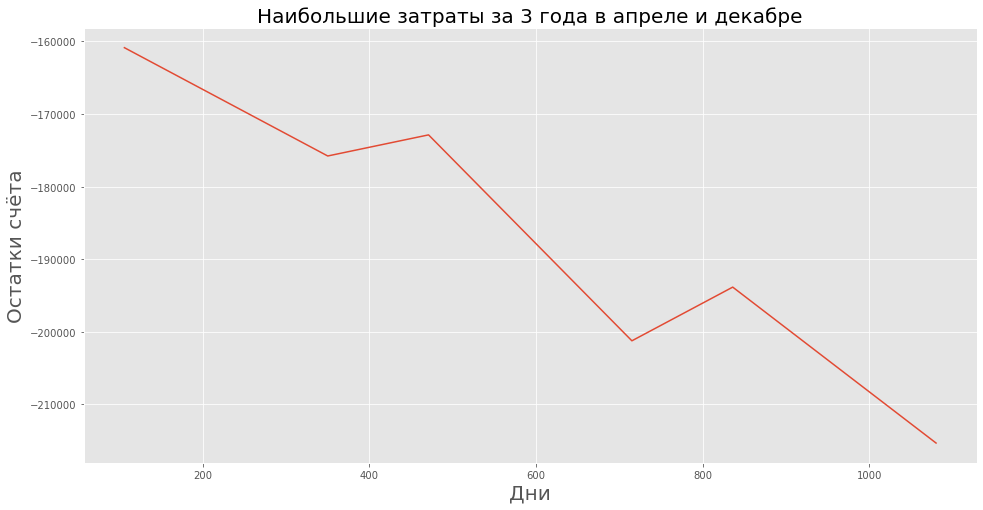

In [12]:
ax, fig = plt.subplots(figsize = (16, 8))
df[((df['month'] == 4) | (df['month'] == 12)) & (df['day'] >= 16) & (df['day'] <= 17)]\
    .account.diff(periods = 1)[1::2].plot()
plt.title('Наибольшие затраты за 3 года в апреле и декабре', fontdict = {'fontsize': 20})
plt.xlabel('Дни', fontdict = {'fontsize': 20})
plt.ylabel('Остатки счёта', fontdict = {'fontsize': 20})
plt.show()

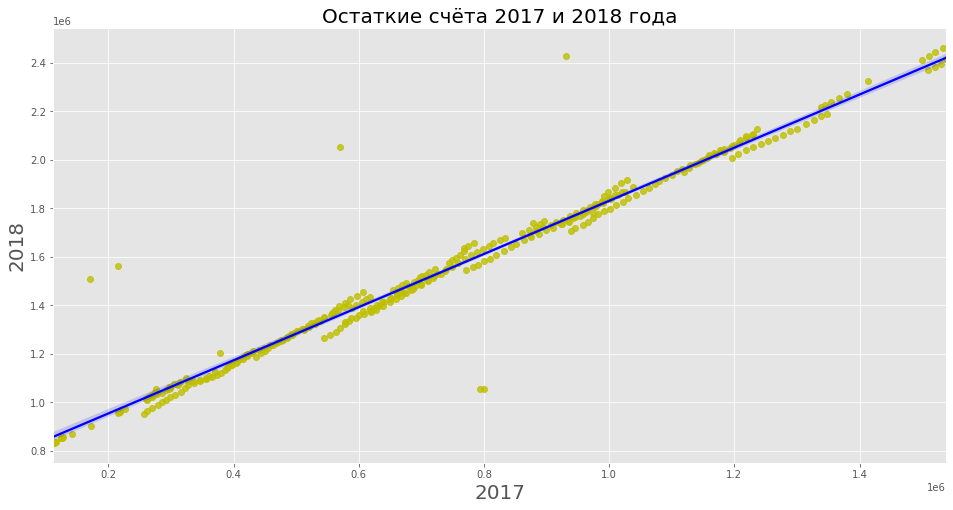

In [13]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16, 8))
x = df[(df['year'] == 2017)]
y = df[(df['year'] == 2018)]
sns.regplot(x.account, y.account, color = 'y', line_kws={"color": "blue"})
plt.title('Остаткие счёта 2017 и 2018 года', fontdict = {'fontsize': 20})
plt.xlabel('2017', fontdict = {'fontsize': 20})
plt.ylabel('2018', fontdict = {'fontsize': 20})
plt.show()
warnings.filterwarnings('default')

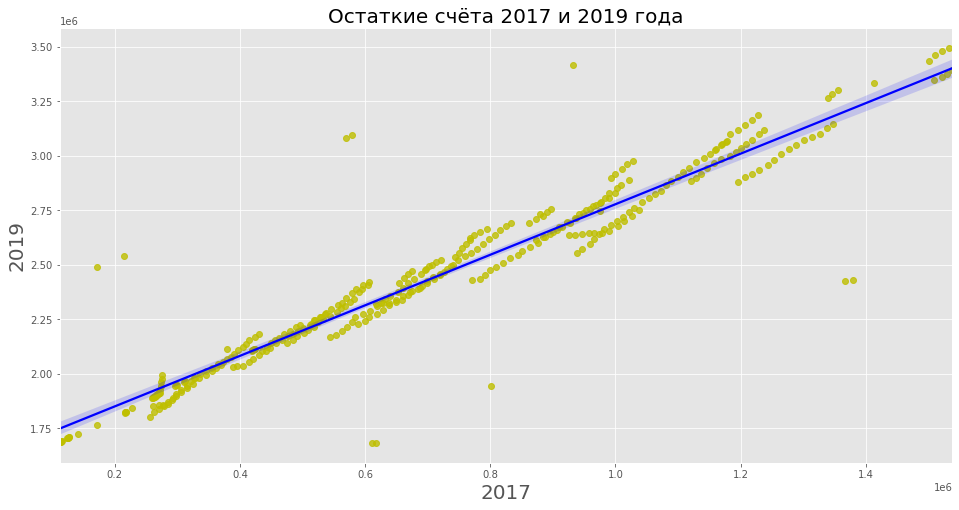

In [15]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16, 8))
x = df[(df['year'] == 2017)]
y = df[(df['year'] == 2019)]
sns.regplot(x.account, y.account, color = 'y', line_kws={"color": "blue"})
plt.title('Остаткие счёта 2017 и 2019 года', fontdict = {'fontsize': 20})
plt.xlabel('2017', fontdict = {'fontsize': 20})
plt.ylabel('2019', fontdict = {'fontsize': 20})
plt.show()

## Data Preparation

##### Возможные решения:
* Авто-регрессия (AR - AutoRegressive) 
* Скользящее среднее (MA - Moving Average)
* Экспоненциальное сглаживание (Exponential Smoothing)
* ARMA, ARIMA, SARIMA ***
* Линейная/Полиномиальная регрессия (LinearRegression, SVR, PolynomialFeatures)

## Приводим ряд в стационарный для использования модели SARIMA (теорема Волда)

Стабилизация дисперсии с помощью преобразования Бокса-Кокса:
лямбда = 0.6616609942446904
p-value = 0.772980


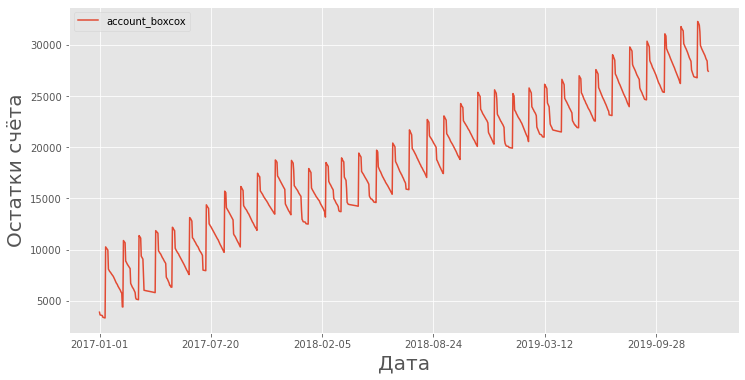

In [16]:
df['account_boxcox'], bc_lambda = boxcox(df.account)
print('Стабилизация дисперсии с помощью преобразования Бокса-Кокса:')
print('лямбда =', bc_lambda)
df.plot(x = 'date', y = 'account_boxcox', figsize = (12, 6))
plt.xlabel('Дата', fontdict = {'fontsize': 20})
plt.ylabel('Остатки счёта', fontdict = {'fontsize': 20})
print("p-value = %f" % sm.tsa.stattools.adfuller(df.account_boxcox)[1])
plt.show()

p-value тест Дики-Фуллера = 0.000000


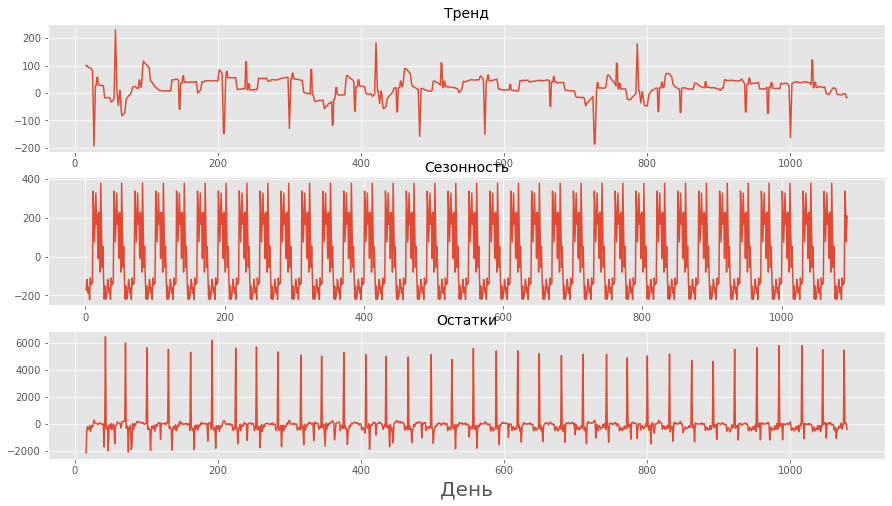

In [17]:
df['account_diff'] = df.account_boxcox.diff(periods = 1)
seas_dec = seasonal_decompose(df['account_diff'][1:], model='additive', period = 30)

fig, (ax_1, ax_2, ax_3) = plt.subplots(3, 1, figsize = (15, 8))

seas_dec.trend.plot(ax = ax_1)
ax_1.set_title('Тренд', fontdict = {'fontsize': 14})

seas_dec.seasonal.plot(ax = ax_2)
ax_2.set_title('Сезонность', fontdict = {'fontsize': 14})

seas_dec.resid.plot(ax = ax_3)
ax_3.set_title('Остатки', fontdict = {'fontsize': 14})

plt.xlabel('День', fontdict = {'fontsize': 20})
print("p-value тест Дики-Фуллера = %f" % sm.tsa.stattools.adfuller(df.account_diff[1:])[1])
plt.show()

# Feature Engineering

In [22]:
def get_salary(data):
    salary_getting = [0]*len(data)
    for i in range(len(data)):
        if salary_getting[i] == 1:
            continue
        elif data.loc[i, 'day'] != 12:
            salary_getting[i] = 0
        elif data.loc[i, 'day'] == 12 and data.loc[i, 'dayoff'] == 0:
            salary_getting[i] = 1
        elif data.loc[i, 'day'] == 12 and data.loc[i, 'dayoff'] == 1:
            if data.loc[i + 1, 'dayoff'] == 0:
                salary_getting[i] = 0
                salary_getting[i + 1] = 1
            elif data.loc[i + 1, 'dayoff'] == 1:
                if data.loc[i + 2, 'dayoff'] == 0:
                    salary_getting[i] = 0
                    salary_getting[i + 1] = 0
                    salary_getting[i + 2] = 1
    return salary_getting

def for_2017(val):
    for i in range(1, len(inflation_2017) + 1):
        if val == i:
            return inflation_2017[i-1]
        
def for_2018(val):
    for i in range(1, len(inflation_2018) + 1):
        if val == i:
            return inflation_2018[i-1]
        
def for_2019(val):
    for i in range(1, len(inflation_2019) + 1):
        if val == i:
            return inflation_2019[i-1]
        
def for_2020(val):
    for i in range(1, len(inflation_2020) + 1):
        if val == i:
            return inflation_2020[i-1]

In [23]:
# https://uchet.kz/week/kak-otdykhaem-v-2020-godu-v-rk/ каленьдарь отдыха в Казахстане
holiday_days = ['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-07', '2017-03-08','2017-05-01', '2017-05-07', '2017-03-20', 
                '2017-03-21', '2017-03-22', '2017-03-23', '2017-05-08', '2017-05-09', '2017-07-06', '2017-07-07', '2017-08-30',
                '2017-09-01', '2017-12-01', '2017-12-16', '2017-12-17', '2017-12-18', '2017-12-19', '2018-01-01', '2018-01-02',
                '2018-01-07', '2018-03-08', '2018-03-09', '2018-03-21', '2018-03-22', '2018-03-23', '2018-04-30', '2018-05-01',
                '2018-05-07', '2018-05-08', '2018-05-09', '2018-07-06', '2017-08-21', '2018-08-30', '2018-08-31', '2018-12-01',
                '2018-12-01', '2018-12-03', '2018-12-16', '2018-12-17', '2018-12-18', '2018-12-31', '2019-01-01', '2019-01-02',
                '2019-01-07', '2019-03-08', '2019-03-21', '2019-03-22', '2019-03-23', '2019-03-25', '2019-05-01', '2019-05-07',
                '2019-05-09', '2019-05-10', '2019-07-06', '2019-07-08', '2019-08-11', '2019-08-30', '2019-12-01', '2019-12-02',
                '2019-12-16', '2019-12-17'
               ]
holiday_days_2020 = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-07', '2020-03-08', '2020-03-09', '2020-03-21', 
                    '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-05-01', '2020-05-07', '2020-05-08',
                    '2020-05-09', '2020-07-06', '2020-07-31', '2020-08-30', '2020-08-31', '2020-12-01', '2020-12-16',
                    '2020-12-17', '2020-12-18']

In [25]:
# https://bankchart.kz/spravochniki/indikatory_rynka/inflation_index/2020 Ежемесячные значения инфляций в Казахстане
inflation_2017 = [0.8, 1.8, 2.3, 2.8, 3.3, 3.7, 3.8, 3.9, 4.2, 5.4, 6.3, 7.0]
inflation_2018 = [0.6, 1.3, 1.8, 2.2, 2.4, 2.6, 2.7, 2.9, 3.3, 3.7, 4.6, 5.3]
inflation_2019 = [0.5, 0.8, 1.3, 1.8, 2.4, 2.6, 2.8, 3.0, 3.3, 3.9, 4.6, 5.3]
inflation_2020 = [0.7, 1.3, 2.2, 3.1, 3.6, 4.0, 4.3, 4.4, 4.7, 5.3, 6.2, 7.1]

df['inflation_rate'] = 0.0

df.loc[df['year'] == 2017, 'inflation_rate'] = df['month'].apply(for_2017)
df.loc[df['year'] == 2018, 'inflation_rate'] = df['month'].apply(for_2018)
df.loc[df['year'] == 2019, 'inflation_rate'] = df['month'].apply(for_2019)

In [26]:
df['holidays'] = df.date.isin(holiday_days).replace([True, False], [1, 0])

df['weekday'] = df.datetime.dt.dayofweek.values

df['weekend'] = df.weekday.replace([0, 1, 2, 3, 4, 5, 6], [0, 0, 0, 0, 0, 1, 1])

df['dayoff'] = (df.holidays + \
                df.weekend).replace([1, 2, 3], 1)

df['will_get_salary'] = get_salary(df)

exog = df[['inflation_rate', 'holidays', 'weekday', 'weekend', 'will_get_salary']].values.astype('float32')

df.head(3)

,date,account,datetime,year,month,day,account_boxcox,account_diff,inflation_rate,holidays,weekday,weekend,dayoff,will_get_salary
0,2017-01-01,141969,2017-01-01,2017,1,1,3874.365381,NaN,0.8,1,6,1,1,0
1,2017-01-02,127567,2017-01-02,2017,1,2,3609.529280,-264.836100,0.8,1,0,0,1,0
2,2017-01-03,126604,2017-01-03,2017,1,3,3591.469520,-18.059761,0.8,1,1,0,1,0


# Modeling

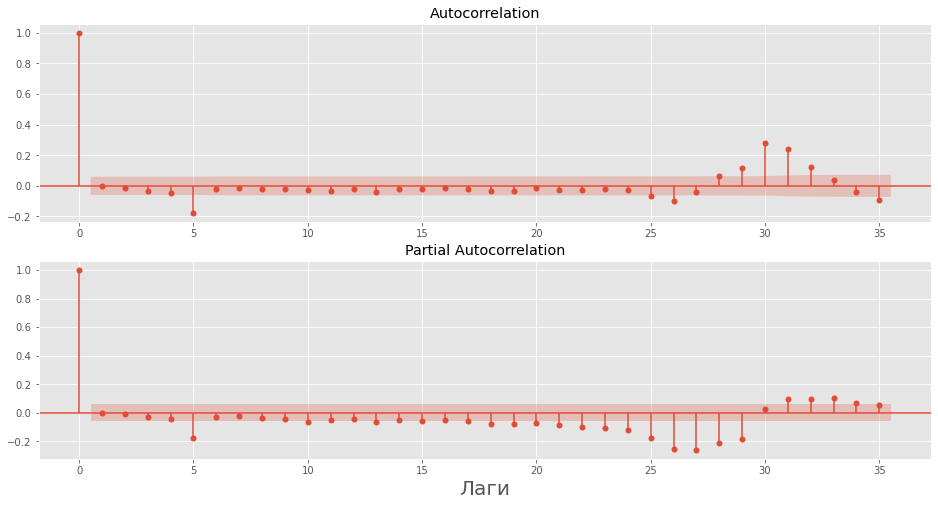

In [20]:
fig, axes = plt.subplots(2, figsize = (16, 8))
plot_acf(df.account_diff[1:], lags = 35, ax = axes[0])
plot_pacf(df.account_diff[1:], lags = 35, ax = axes[1])
plt.xlabel('Лаги', fontdict = {'fontsize': 20})
plt.show()

In [21]:
p_s = range(0, 6) # 1
P_s = range(0, 4) # 1
q_s = range(0, 6) # 5
Q_s = range(0, 4) # 3
params = list(product(p_s, q_s, P_s, Q_s))

In [ ]:
"""
%%time
res = []
best_aic = float("inf")
for param in params:
    try:
        model = SARIMAX(df_account_bc.account_boxcox.values, 
                      order = (param[0], 1, param[1]), 
                      seasonal_order = (param[2], 1, param[3], 30), initialization='approximate_diffuse').fit(disp = -1)
    except ValueError:
        print('Wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    res.append([param, model.aic])
    print(best_aic)
    print(best_param)
"""

In [27]:
%%time
sarimax_model = SARIMAX(df.account_boxcox, exog = exog,
                       order = (1, 1, 5), seasonal_order = (1, 1, 3, 30)).fit()
sarimax_model.summary()

Wall time: 3min 34s


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                             account_boxcox   No. Observations:                 1095
Model:             SARIMAX(1, 1, 5)x(1, 1, [1, 2, 3], 30)   Log Likelihood               -8325.528
Date:                                    Wed, 14 Apr 2021   AIC                          16683.057
Time:                                            21:49:31   BIC                          16762.573
Sample:                                                 0   HQIC                         16713.188
                                                   - 1095                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -41.0928     56.176     -0.731      0.464    -151.196      69.011
x2          -305.2419     72.365     -4.218      0.000    -447.075    -163.409
x3           -12.0320      8.500     -1.416      0.157     -28.692       4.628
x4          -118.1889     48.888     -2.418      0.016    -214.009     -22.369
x5          2775.1714     44.826     61.910      0.000    2687.314    2863.029
ar.L1         -0.0620      0.150     -0.414      0.679      -0.355       0.231
ma.L1          0.2861      0.155      1.849      0.064      -0.017       0.589
ma.L2         -0.4454      0.042    -10.722      0.000      -0.527      -0.364
ma.L3         -0.2431      0.081     -3.013      0.003      -0.401      -0.085
ma.L4         -0.2257      0.057     -3.976      0.000      -0.337      -0.114
ma.L5         -0.2045      0.042     -4.838      0.000      -0.287      -0.122
ar.S.L30       0.8563      0.464      1.845      0.065      -0.053       1.766
ma.S.L30      -1.4679      0.467     -3.145      0.002      -2.383      -0.553
ma.S.L60       0.4228      0.283      1.494      0.135      -0.132       0.978
ma.S.L90       0.0781      0.066      1.186      0.235      -0.051       0.207
sigma2      3.854e+05   1.49e+04     25.861      0.000    3.56e+05    4.15e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):              1057.49
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Насколько хороша наша модель? Анализ остатков (Residuals)
#### Хорошая модель: 
* Стационарность остатков
* Несмещенность остатков
* Неавтокоррелированность остатков

## Тест Стьюдента (Одновыборочный t - критерий).
#### {$H_0$: $E(X) = m$ - выборочное среднее равно какому-то значению m; $H_1$:  Иначе}. Несмещённость - равенство среднего значения нуля

p-value тест Дики-Фуллера = 0.000000
p-value тест Стьюдента = 0.411670


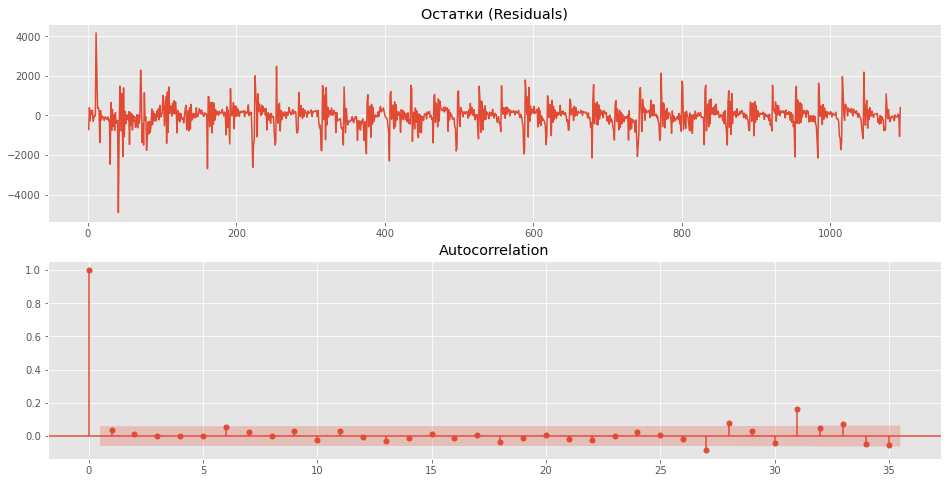

In [28]:
fig, axes = plt.subplots(2, figsize = (16, 8))
(sarimax_model.resid[1:]).plot(ax = axes[0], title = 'Остатки (Residuals)')
plot_acf(sarimax_model.resid[1:], lags = 35, ax = axes[1])
print("p-value тест Дики-Фуллера = %f" % sm.tsa.stattools.adfuller(sarimax_model.resid[1:])[1])
print("p-value тест Стьюдента = %f" % ttest_1samp(sarimax_model.resid[1:], 0)[1])
plt.show()

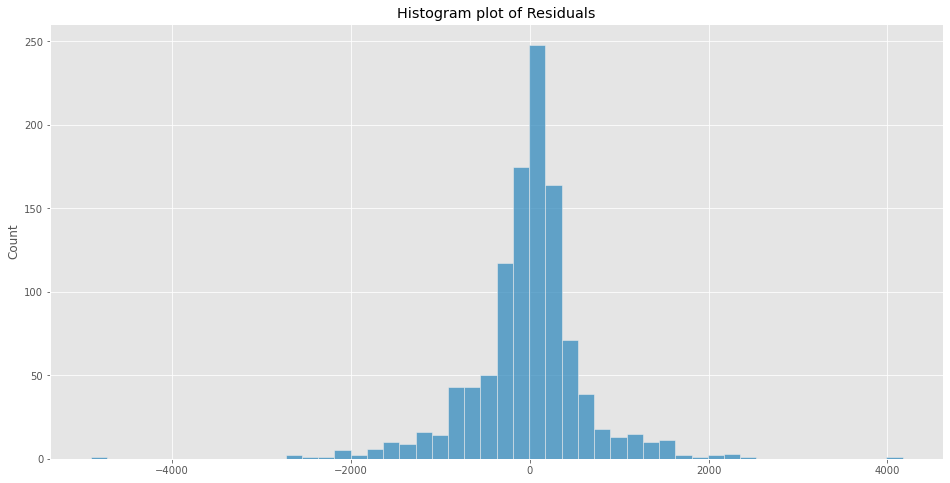

In [29]:
fig, axes = plt.subplots(figsize = (16, 8))
sns.histplot(sarimax_model.resid[1:], bins = 50)
plt.title('Histogram plot of Residuals');

In [30]:
df_predict = pd.read_csv('_kaspi_predict.csv').iloc[:, [0, 2]]
df_predict['datetime'] = pd.to_datetime(df_predict['date'])
df_predict['year'] = df_predict.datetime.dt.year
df_predict['month'] = df_predict.datetime.dt.month
df_predict['day'] = df_predict.datetime.dt.day

df_predict['holidays'] = df_predict.date.isin(holiday_days_2020).replace([True, False], [1, 0])

df_predict['weekday'] = df_predict.datetime.dt.dayofweek.values

df_predict['weekend'] = df_predict.weekday.replace([0, 1, 2, 3, 4, 5, 6], [0, 0, 0, 0, 0, 1, 1])

df_predict['dayoff'] = (df_predict.holidays + \
                df_predict.weekend).replace([1, 2, 3], 1)

df_predict['will_get_salary'] = get_salary(df_predict)

df_predict.loc[df_predict['year'] == 2020, 'inflation_rate'] = df_predict['month'].apply(for_2020)

exog_test = df_predict[['inflation_rate', 'holidays', 'weekday', 'weekend', 'will_get_salary']].values.astype('float32')

df_predict.head(1)

,Id,date,datetime,year,month,day,holidays,weekday,weekend,dayoff,will_get_salary,inflation_rate
0,1095,2020-01-01,2020-01-01,2020,1,1,1,2,0,1,0,0.7


In [46]:
df_predict['account'] = inv_boxcox(sarimax_model.forecast(366, exog = exog_test), 
                                        bc_lambda).values

smoothed = medfilt(inv_boxcox(sarimax_model.forecast(366, exog = exog_test), 
                                        bc_lambda).values, 5)
df_predict['pred_smoothed'] = smoothed

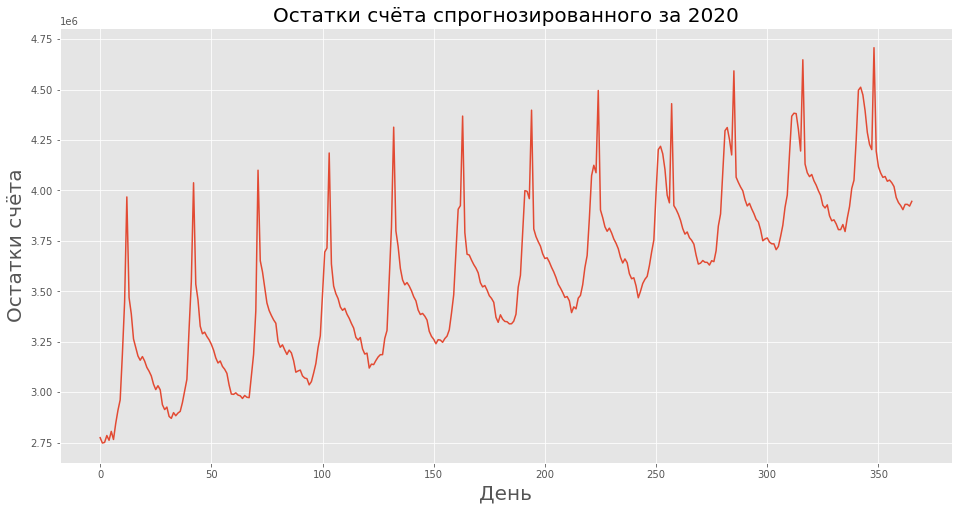

In [32]:
ax, fig = plt.subplots(figsize = (16, 8))
df_predict.account.plot()
plt.title('Остатки счёта спрогнозированного за 2020', fontdict = {'fontsize': 20})
plt.xlabel('День', fontdict = {'fontsize': 20})
plt.ylabel('Остатки счёта', fontdict = {'fontsize': 20})
plt.show()

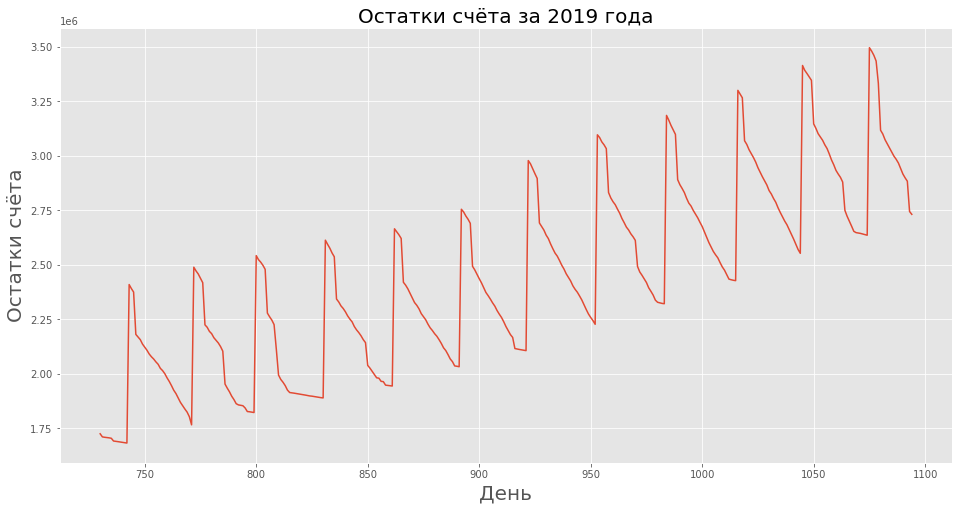

In [33]:
ax, fig = plt.subplots(figsize = (16, 8))
df[730:].account.plot()
plt.title('Остатки счёта за 2019 года', fontdict = {'fontsize': 20})
plt.xlabel('День', fontdict = {'fontsize': 20})
plt.ylabel('Остатки счёта', fontdict = {'fontsize': 20})
plt.show()

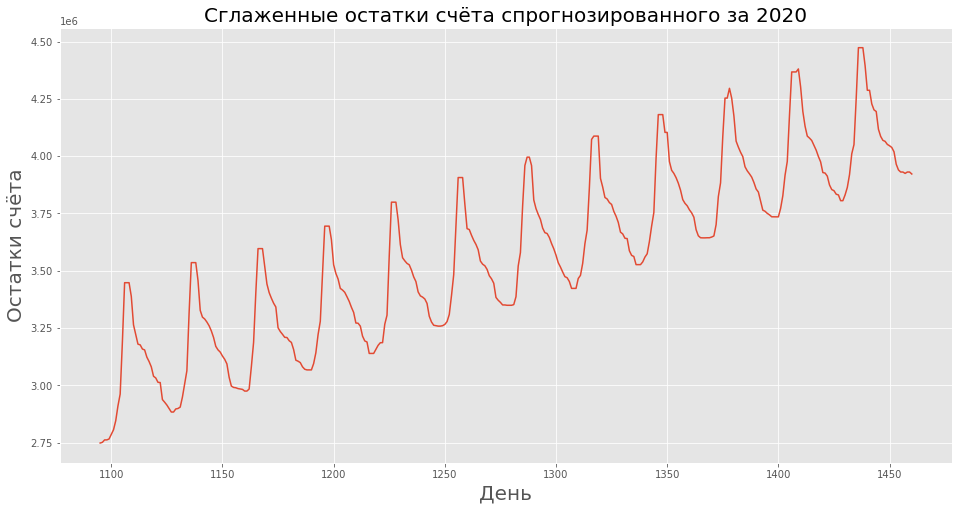

In [50]:
ax, fig = plt.subplots(figsize = (16, 8))
df_predict.pred_smoothed.plot()
plt.title('Сглаженные остатки счёта спрогнозированного за 2020', fontdict = {'fontsize': 20})
plt.xlabel('День', fontdict = {'fontsize': 20})
plt.ylabel('Остатки счёта', fontdict = {'fontsize': 20})
plt.show()

In [49]:
df_predict.index = df_predict.Id
df_predict_submit = df_predict.iloc[:, [-1]]
df_predict_submit = df_predict_submit.rename(columns = {'pred_smoothed': 'account'})
df_predict_submit.to_csv('21 try SARIMAX(1, 1, 5)x(1, 1, [1, 2, 3], 30) with exogs inflation_rate, holidays, weekday, weekend, will_get_salary, cumilative inflation smoothed 5.csv')

In [51]:
df_total = df[['account']]
df_total = pd.concat([df_total, df_predict_submit])

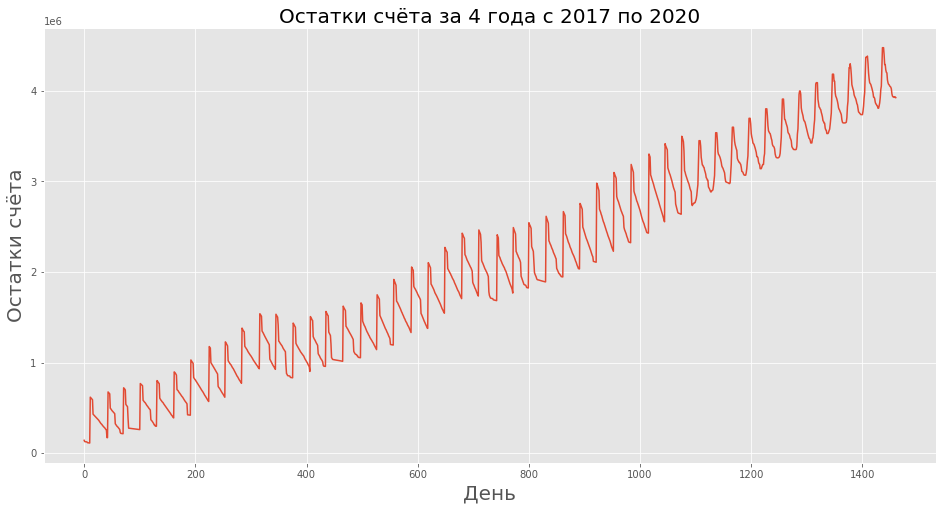

In [52]:
ax, fig = plt.subplots(figsize = (16, 8))
df_total.account.plot()
plt.title('Остатки счёта за 4 года с 2017 по 2020', fontdict = {'fontsize': 20})
plt.xlabel('День', fontdict = {'fontsize': 20})
plt.ylabel('Остатки счёта', fontdict = {'fontsize': 20})
plt.show()